In [2]:
import math
def direction_diff(next_point, prev_point):
    track_dir = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])    
    track_degrees = math.degrees(track_dir)   
    return track_degrees

In [3]:
direction_diff((5,3),(4,4))

-45.0

In [6]:
from matplotlib import pyplot as plt

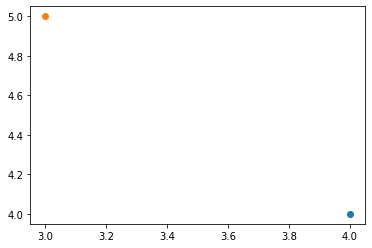

In [5]:
plt.scatter(4,4)
plt.scatter(3,5)

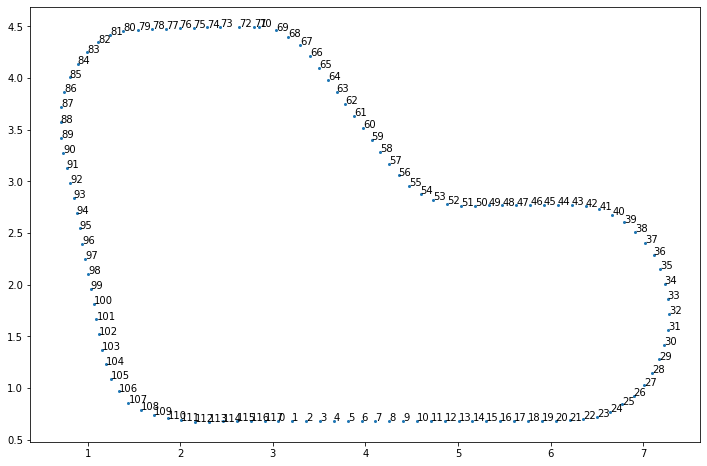

In [13]:
import numpy as np
track = np.load('/Users/TimothyW/Downloads/reinvent_base.npy')
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(track[:-1,0], track[:-1,1], s=4)

for i in range(0, track.shape[0] - 1):    
    plt.annotate(f"{i}", (track[i,0], track[i, 1]))

In [25]:
outer_track = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,48,49,50,51,52,53,54,55,56,57,58,59}
inner_track = {23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,67,68,69,70}
middle_track = {44,45,46,47,60,61,62,63,64,65,66}
#over_70 inner track

In [26]:
def path_reward(next_waypoint, outer_track_waypoints, middle_track_waypoints, inner_track_waypoints, track_width, distance_from_center, is_left_of_center):
    if next_waypoint in middle_track_waypoints:
        marker_1 = 0.1 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.5 * track_width

        # Give higher reward if the car is closer to center line and vice versa
        if distance_from_center <= marker_1:
            return 2.0
        elif distance_from_center <= marker_2:
            return 0.5
        elif distance_from_center <= marker_3:
            return 0.1
        else:
            return 1e-3        
    elif next_waypoint in outer_track_waypoints:
        marker_1 = 0.33 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.1 * track_width

        if distance_from_center > marker_1 and not is_left_of_center:
            return 2.0
        elif distance_from_center > marker_2 and not is_left_of_center:
            return 1.25
        elif distance_from_center > marker_3 and not is_left_of_center:
            return 0.5
        else:
            return 1e-3
        
    elif next_waypoint in inner_track_waypoints or next_waypoint > 70:
        marker_1 = 0.33 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.1 * track_width
        if distance_from_center > marker_1 and is_left_of_center:
            return 2.0
        elif distance_from_center > marker_2 and is_left_of_center:
            return 1.25
        elif distance_from_center > marker_3 and is_left_of_center:
            return 0.5
        else:
            return 1e-3
        
    else:
        raise ValueError("crap")



In [27]:
path_reward(75, outer_track, middle_track, inner_track, track_width=1.6, distance_from_center= 0.37*1.6, is_left_of_center=True)

2.0

In [28]:
import numpy as np

In [29]:
track_width = 1.6
a = np.arange(0.0, 0.5, 0.01)

In [30]:
rewards = []
for i in range(0, len(a)):
    rewards.append(path_reward(75, outer_track, middle_track, inner_track, track_width=1.6, distance_from_center = a[i] * 1.6, is_left_of_center=True))

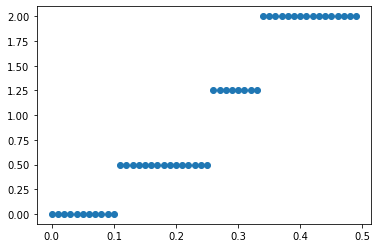

In [31]:
plt.scatter(a, rewards)

In [32]:
from scipy.stats import norm

In [33]:
norm.pdf(0.5, 0.5,1.0)

0.3989422804014327

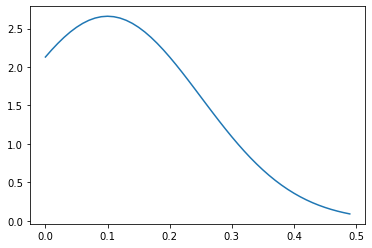

In [34]:
plt.plot(a, norm.pdf(a, 0.1, 0.15))

In [65]:
def get_path_reward_two(nearest_way_point, out_points, center_points, in_points, is_left_of_center, distance_from_center_w):
    if is_left_of_center:
        distance_from_center_unabs = distance_from_center_w
    else:
        distance_from_center_unabs = distance_from_center_w

    if nearest_way_point in center_points:
        return gaussian(distance_from_center_unabs, 0.0, 0.15)* 0.75
    elif nearest_way_point in out_points:
        return gaussian(distance_from_center_unabs, 0.2, 0.15) * 0.75
    elif nearest_way_point in in_points or nearest_way_point > 70:
        return gaussian(distance_from_center_unabs, -0.2, 0.15)*0.75


In [66]:
f_track_ws = np.arange(-0.5,0.5,0.01)

In [67]:
from math import e, sqrt, pi
def gaussian(x, m, s):
    gauss = 1/(sqrt(2*pi)*s)*e**(-0.5*(float(x-m)/s)**2)
    return gauss

In [72]:
rewards = []
t = []
for i in range(0, len(f_track_ws)):
    if f_track_ws[i] < 0:
        is_left_of_center = True
    else:
        is_left_of_center = False
    rewards.append(get_path_reward_two(75, outer_track, middle_track, inner_track, is_left_of_center, f_track_ws[i]))

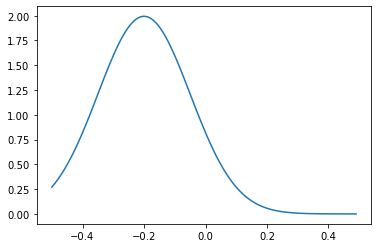

In [73]:
plt.plot(f_track_ws, rewards)

In [92]:
def get_heading_reward(track_dir, heading):
    abs_diff = abs(track_dir - heading)
    return gaussian(abs_diff, 0.0, 20)
    

In [93]:
h = np.arange(-50,50)


In [96]:
hr = []
for i in range(0, len(h)):
    hr.append(get_heading_reward(0.0, h[i])*100.0)

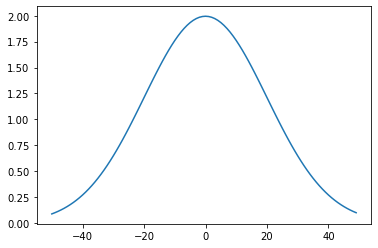

In [97]:
plt.plot(h, hr)

In [103]:
s = np.arange(0.0,4.0,0.1)

In [114]:
sr = []
for i in range(0, len(s)):
    sr.append(gaussian(s[i], 4.0, 1.75)*8.75)

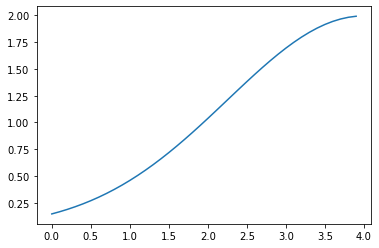

In [115]:
plt.plot(s,sr)

In [116]:
def get_path_reward_two(
    nearest_way_point,
    out_points,
    center_points,
    in_points,
    is_left_of_center,
    distance_from_center_w,
):
    if is_left_of_center:
        distance_from_center_unabs = distance_from_center_w * -1
    else:
        distance_from_center_unabs = distance_from_center_w

    if nearest_way_point in center_points:
        return gaussian(distance_from_center_unabs, 0.0, 0.15) * 0.75
    elif nearest_way_point in out_points:
        return gaussian(distance_from_center_unabs, 0.2, 0.15) * 0.75
    elif nearest_way_point in in_points or nearest_way_point > 70:
        return gaussian(distance_from_center_unabs, -0.2, 0.15) * 0.75

In [120]:
get_path_reward_two(32, outer_track, middle_track, inner_track, False, 0.2)

0.05697993011898718